# <center><u>Audiobook App</u></center>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('audiobook.csv')
df.head()

,Unnamed: 0,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [4]:
df.drop(['Unnamed: 0','Review10/10'],axis=1,inplace=True)
df.head(1)

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,1620.0,1620,19.73,19.73,1,0.99,1603.8,5,92,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Book_length(mins)_overall        14084 non-null  float64
 1   Book_length(mins)_avg            14084 non-null  int64  
 2   Price_overall                    14084 non-null  float64
 3   Price_avg                        14084 non-null  float64
 4   Review                           14084 non-null  int64  
 5   Completion                       14084 non-null  float64
 6   Minutes_listened                 14084 non-null  float64
 7   Support_Request                  14084 non-null  int64  
 8   Last_Visited_mins_Purchase_date  14084 non-null  int64  
 9   Target                           14084 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.1 MB


In [6]:
df = df.rename(columns={"Book_length(mins)_overall":"Book_length_avg",
                        "Book_length(mins)_avg":"Book_length_overall",
                        "Price_overall":"Price_avg",
                        "Price_avg":"Price_overall",
                       "Last_Visited_mins_Purchase_date":"LastVisite_vs_PurchaseDate"})

In [7]:
df.head(1)

,Book_length_avg,Book_length_overall,Price_avg,Price_overall,Review,Completion,Minutes_listened,Support_Request,LastVisite_vs_PurchaseDate,Target
0,1620.0,1620,19.73,19.73,1,0.99,1603.8,5,92,0


In [8]:
df['Rebuy'] = df['Book_length_overall']/df['Book_length_avg']
df['Number_of_purchases'] = round(df['Price_overall']/df['Price_avg'])


In [9]:
def higher1(x):
    if x>1:
        return 1
    else:
        return 0 
    
######################

def higher0(x):
    if x>0:
        return 1
    else:
        return 0 


In [10]:
df['Rebuy'] = df['Rebuy'].apply(higher1)
df['Listened'] = df['Completion'].apply(higher0)

In [11]:
df.head()

,Book_length_avg,Book_length_overall,Price_avg,Price_overall,Review,Completion,Minutes_listened,Support_Request,LastVisite_vs_PurchaseDate,Target,Rebuy,Number_of_purchases,Listened
0,1620.0,1620,19.73,19.73,1,0.99,1603.8,5,92,0,0,1.0,1
1,2160.0,2160,5.33,5.33,0,0.00,0.0,0,0,0,0,1.0,0
2,2160.0,2160,5.33,5.33,0,0.00,0.0,0,388,0,0,1.0,0
3,1620.0,1620,5.96,5.96,0,0.42,680.4,1,129,0,0,1.0,1
4,2160.0,2160,5.33,5.33,0,0.22,475.2,0,361,0,0,1.0,1


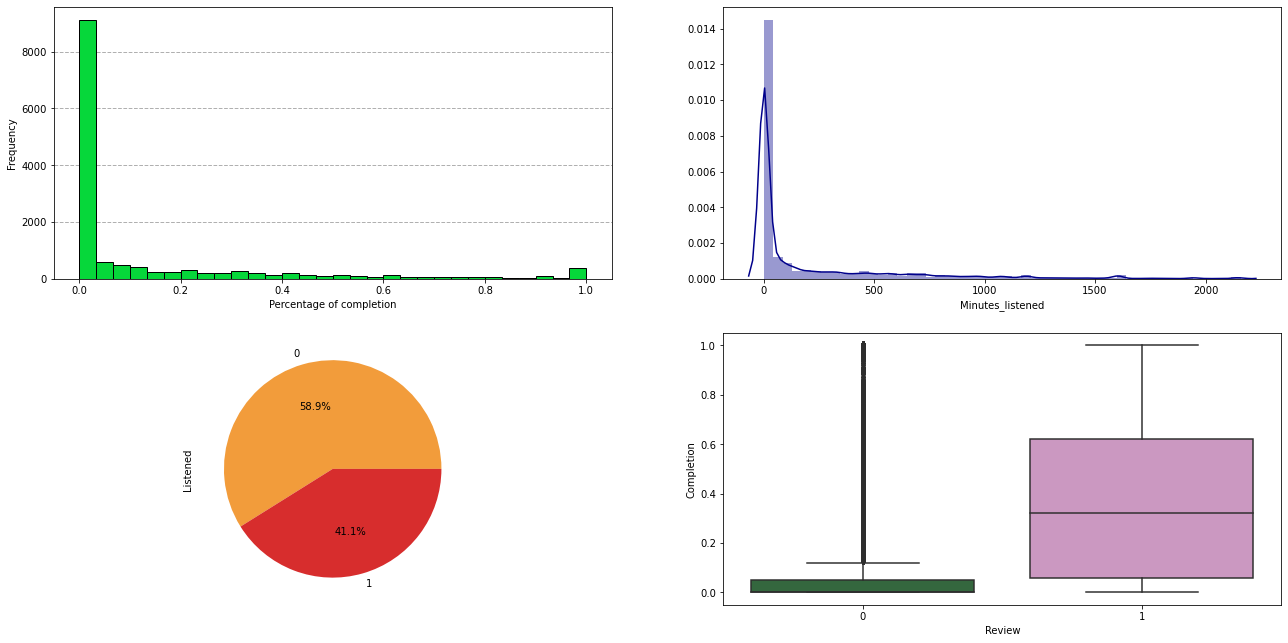

In [59]:
fig,axes=plt.subplots(2,2,figsize=(22,11))

fig1 = sns.boxplot(ax=axes[1,1],x='Review',y='Completion',data=df,palette="cubehelix")

colors = ['#F29C3B','#D72D2D']
fig2 = df['Listened'].value_counts().plot.pie(ax=axes[1,0],autopct="%1.1f%%",colors=colors)

fig3 = df['Completion'].plot.hist(ax=axes[0,0],bins=30,Edgecolor='black',color='#06D73A',zorder=3)
fig3.set_xlabel('Percentage of completion')
fig3.grid(axis = 'y', linestyle = '--', linewidth = 1, zorder=0)

fig4 = sns.distplot(df['Minutes_listened'],ax=axes[0,1],color="darkblue")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book_length_avg             14084 non-null  float64
 1   Book_length_overall         14084 non-null  int64  
 2   Price_avg                   14084 non-null  float64
 3   Price_overall               14084 non-null  float64
 4   Review                      14084 non-null  int64  
 5   Completion                  14084 non-null  float64
 6   Minutes_listened            14084 non-null  float64
 7   Support_Request             14084 non-null  int64  
 8   LastVisite_vs_PurchaseDate  14084 non-null  int64  
 9   Target                      14084 non-null  int64  
 10  Rebuy                       14084 non-null  int64  
 11  Number_of_purchases         14084 non-null  float64
 12  Listened                    14084 non-null  int64  
dtypes: float64(6), int64(7)
memory 

In [12]:
df['Book_length_avg'].astype('int64')
df['Number_of_purchases'].astype('int8')

0        1
1        1
2        1
3        1
4        1
        ..
14079    1
14080    1
14081    1
14082    1
14083    2
Name: Number_of_purchases, Length: 14084, dtype: int8

In [13]:
df2 = df.copy()
df2 = (df2-df2.min())/(df2.max()-df2.min())
df2.head()

,Book_length_avg,Book_length_overall,Price_avg,Price_overall,Review,Completion,Minutes_listened,Support_Request,LastVisite_vs_PurchaseDate,Target,Rebuy,Number_of_purchases,Listened
0,0.722222,0.206349,0.124882,0.124882,1.0,0.99,0.7425,0.166667,0.198276,0.0,0.0,0.0,1.0
1,1.000000,0.285714,0.011568,0.011568,0.0,0.00,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,1.000000,0.285714,0.011568,0.011568,0.0,0.00,0.0000,0.000000,0.836207,0.0,0.0,0.0,0.0
3,0.722222,0.206349,0.016525,0.016525,0.0,0.42,0.3150,0.033333,0.278017,0.0,0.0,0.0,1.0
4,1.000000,0.285714,0.011568,0.011568,0.0,0.22,0.2200,0.000000,0.778017,0.0,0.0,0.0,1.0


In [14]:
df2 = df2.drop_duplicates()

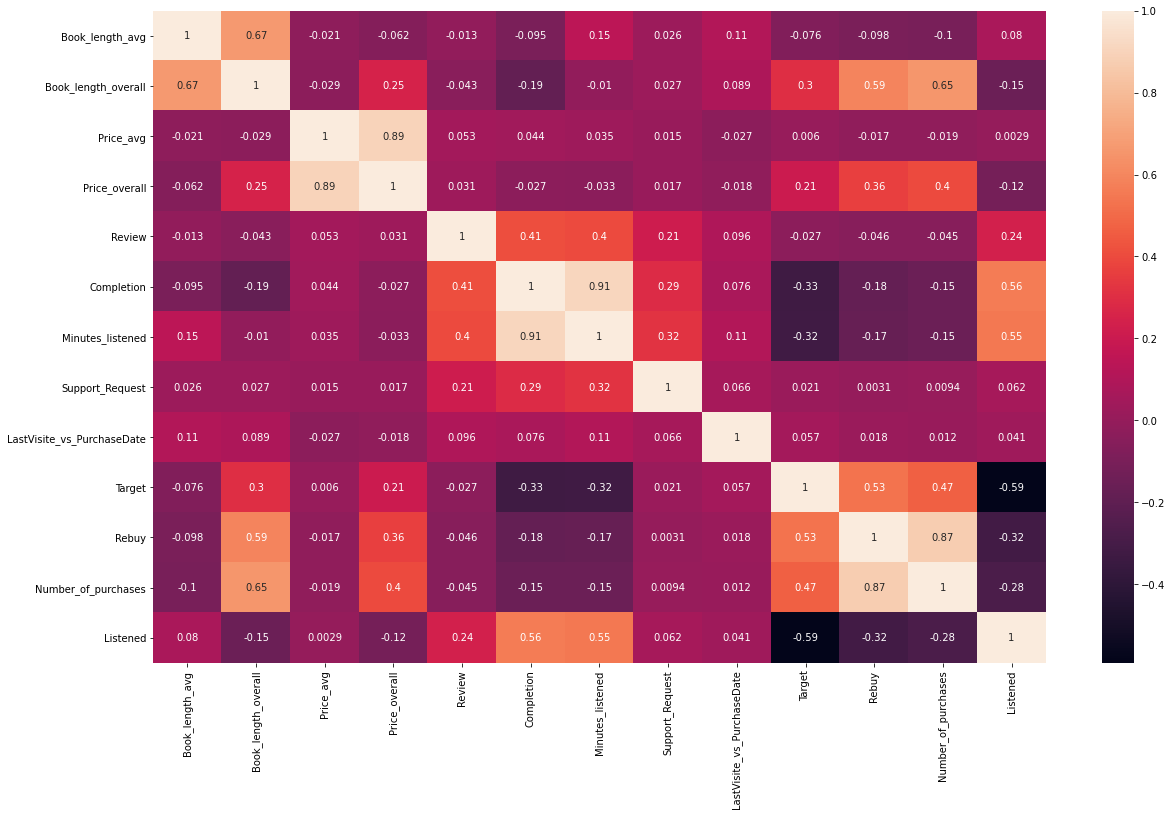

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(df2.corr(),annot=True)

In [16]:
df3 = df2.corr()[['Target']].abs()
df3 = df3.reset_index()

In [17]:
df4 = df3.loc[df3['Target']>= 0.2]

In [18]:
df4

,index,Target
1,Book_length_overall,0.299310
3,Price_overall,0.205041
5,Completion,0.330627
6,Minutes_listened,0.323703
9,Target,1.000000
10,Rebuy,0.532906
11,Number_of_purchases,0.466261
12,Listened,0.591888


In [19]:
col_list = []

for col in df4['index']:
    col_list.append(col)

In [20]:
data = df2[col_list]

In [21]:
data

,Book_length_overall,Price_overall,Completion,Minutes_listened,Target,Rebuy,Number_of_purchases,Listened
0,0.206349,0.124882,0.99,0.7425,0.0,0.0,0.0,1.0
1,0.285714,0.011568,0.00,0.0000,0.0,0.0,0.0,0.0
2,0.285714,0.011568,0.00,0.0000,0.0,0.0,0.0,0.0
3,0.206349,0.016525,0.42,0.3150,0.0,0.0,0.0,1.0
4,0.285714,0.011568,0.22,0.2200,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14077,0.206349,0.021168,0.00,0.0000,0.0,0.0,0.0,0.0
14078,0.285714,0.032499,0.00,0.0000,0.0,0.0,0.0,0.0
14079,0.206349,0.011568,0.61,0.4575,0.0,0.0,0.0,1.0
14080,0.126984,0.021168,0.29,0.1450,0.0,0.0,0.0,1.0


In [22]:
move_column = data.pop("Target")
data.insert(7,"Target",move_column)

In [23]:
data

,Book_length_overall,Price_overall,Completion,Minutes_listened,Rebuy,Number_of_purchases,Listened,Target
0,0.206349,0.124882,0.99,0.7425,0.0,0.0,1.0,0.0
1,0.285714,0.011568,0.00,0.0000,0.0,0.0,0.0,0.0
2,0.285714,0.011568,0.00,0.0000,0.0,0.0,0.0,0.0
3,0.206349,0.016525,0.42,0.3150,0.0,0.0,1.0,0.0
4,0.285714,0.011568,0.22,0.2200,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
14077,0.206349,0.021168,0.00,0.0000,0.0,0.0,0.0,0.0
14078,0.285714,0.032499,0.00,0.0000,0.0,0.0,0.0,0.0
14079,0.206349,0.011568,0.61,0.4575,0.0,0.0,1.0,0.0
14080,0.126984,0.021168,0.29,0.1450,0.0,0.0,1.0,0.0


# Model Development

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

In [25]:
y = data['Target']
X = data.drop('Target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [41]:
def performance(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    conf_matrix = confusion_matrix(y_test,model.predict(X_test))
    print(f"ACCURACY:{accuracy}")
    print(f"CONFUSION MATRIX:\n{conf_matrix}")

In [55]:
def cross_validation(model,param_grid):
    grid = GridSearchCV(model,param_grid,cv=5)
    grid.fit(X_train,y_train)
    estimator = grid.best_estimator_
    accuracy = estimator.score(X_test,y_test)
    params = grid.best_params_
    print(f"BEST PARAMETERS:{params}")
    print(f"BEST ACCURACY:{accuracy}")
    

## KNeighbors Classifier

In [42]:
KN = KNeighborsClassifier()
performance(KN,X_train,X_test,y_train,y_test)

ACCURACY:0.8586839266450917
CONFUSION MATRIX:
[[1429   59]
 [ 203  163]]


In [56]:
param_KN = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
cross_validation(KNeighborsClassifier(),param_KN)

BEST PARAMETERS:{'metric': 'manhattan', 'n_neighbors': 6}
BEST ACCURACY:0.8673139158576052


## Logistic Regression

In [57]:
lr = LogisticRegression()
performance(lr,X_train,X_test,y_train,y_test)

ACCURACY:0.8705501618122977
CONFUSION MATRIX:
[[1487    1]
 [ 239  127]]


## Support Vector Classification

In [59]:
svc = SVC()
performance(svc,X_train,X_test,y_train,y_test)

ACCURACY:0.8705501618122977
CONFUSION MATRIX:
[[1488    0]
 [ 240  126]]


In [63]:
param_svc = {'C':[1,10,100,1000],
             'gamma':[1,0.1,0.001,0.0001], 
             'kernel':['linear','rbf']}
cross_validation(SVC(),param_svc)

BEST PARAMETERS:{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
BEST ACCURACY:0.8710895361380798


## Random Forest Classifier

In [64]:
rfc = RandomForestClassifier()
performance(rfc,X_train,X_test,y_train,y_test)

ACCURACY:0.8554476806903991
CONFUSION MATRIX:
[[1418   70]
 [ 198  168]]


In [65]:
param_rfc = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}
cross_validation(RandomForestClassifier(),param_rfc)

BEST PARAMETERS:{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 1500}
BEST ACCURACY:0.8705501618122977
